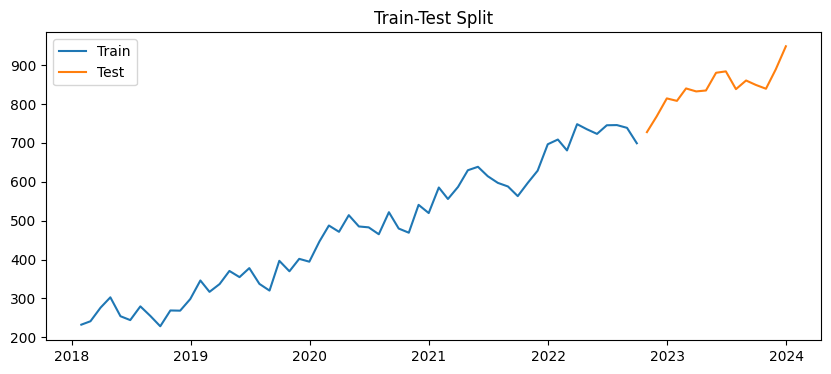

🔹 ARIMA Model Performance:
MAE: 134.45, RMSE: 143.56, MAPE: 15.68%

🔹 SARIMA Model Performance:
MAE: 19.80, RMSE: 25.32, MAPE: 2.30%


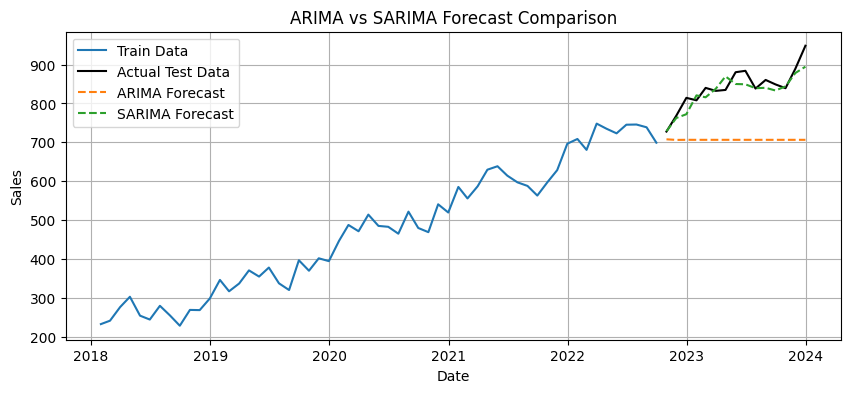

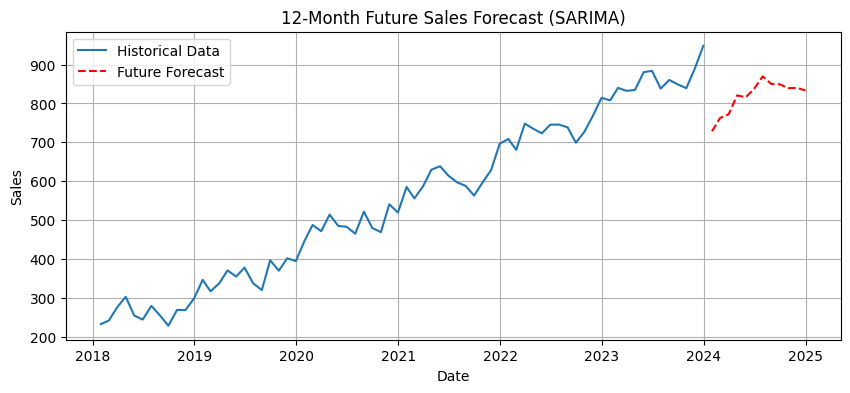

✅ Time Series Forecasting Complete!


In [1]:
# Time Series Forecasting using ARIMA and SARIMA
# Requirements: pandas, numpy, matplotlib, statsmodels, sklearn
# Install if needed: pip install pandas numpy matplotlib statsmodels scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# 1. Generate or Load Time Series Data
# -----------------------------
np.random.seed(42)
date_rng = pd.date_range(start='2018-01-01', end='2023-12-31', freq='M')
sales = 200 + 10*np.arange(len(date_rng)) + 40*np.sin(2*np.pi*date_rng.month/12) + np.random.normal(0, 25, len(date_rng))
df = pd.DataFrame({'Date': date_rng, 'Sales': sales})
df.set_index('Date', inplace=True)

# -----------------------------
# 2. Train-Test Split
# -----------------------------
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train-Test Split')
plt.legend()
plt.show()

# -----------------------------
# 3. ARIMA Model (Non-seasonal)
# -----------------------------
# (p, d, q) = (autoregressive order, differencing order, moving average order)
arima_model = ARIMA(train['Sales'], order=(1,1,1))
arima_result = arima_model.fit()

# Forecast for test period
arima_forecast = arima_result.forecast(steps=len(test))

# -----------------------------
# 4. SARIMA Model (Seasonal ARIMA)
# -----------------------------
# (p,d,q)(P,D,Q,s) - s=12 for monthly data
sarima_model = SARIMAX(train['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

sarima_forecast = sarima_result.forecast(steps=len(test))

# -----------------------------
# 5. Evaluation Metrics
# -----------------------------
def evaluate_forecast(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    return mae, rmse, mape

arima_mae, arima_rmse, arima_mape = evaluate_forecast(test['Sales'], arima_forecast)
sarima_mae, sarima_rmse, sarima_mape = evaluate_forecast(test['Sales'], sarima_forecast)

print("🔹 ARIMA Model Performance:")
print(f"MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}, MAPE: {arima_mape:.2f}%")

print("\n🔹 SARIMA Model Performance:")
print(f"MAE: {sarima_mae:.2f}, RMSE: {sarima_rmse:.2f}, MAPE: {sarima_mape:.2f}%")

# -----------------------------
# 6. Visualization of Forecast vs Actual
# -----------------------------
plt.figure(figsize=(10,4))
plt.plot(train.index, train['Sales'], label='Train Data')
plt.plot(test.index, test['Sales'], label='Actual Test Data', color='black')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Date'); plt.ylabel('Sales')
plt.legend(); plt.grid(True)
plt.show()

# -----------------------------
# 7. Forecast into the Future
# -----------------------------
future_steps = 12  # forecast 12 months ahead
sarima_future = sarima_result.forecast(steps=future_steps)

# Create future date range
future_dates = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(), periods=future_steps, freq='M')
future_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Sales': sarima_future})
future_df.set_index('Date', inplace=True)

plt.figure(figsize=(10,4))
plt.plot(df['Sales'], label='Historical Data')
plt.plot(future_df['Forecasted_Sales'], label='Future Forecast', linestyle='--', color='red')
plt.title('12-Month Future Sales Forecast (SARIMA)')
plt.xlabel('Date'); plt.ylabel('Sales')
plt.legend(); plt.grid(True)
plt.show()

print("✅ Time Series Forecasting Complete!")